In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint, rand
from sklearn.preprocessing import scale

In [2]:
Y = pd.read_csv('WindramTrainingData.csv', index_col=[0]).T.values
mData = pd.read_csv('WindramMetaData.csv', index_col=[0])

In [3]:
Y = scale(Y)

In [4]:
N, D = Y.shape
print('Time Points: %s, Genes: %s'%(N, D))

Time Points: 24, Genes: 100


In [5]:
mData['capture'].values

array([ 6,  6,  6,  6,  6,  6, 18, 18, 18, 18, 18, 18, 30, 30, 30, 30, 30,
       30, 42, 42, 42, 42, 42, 42], dtype=int64)

In [12]:
#data, normalized_data = readData()

typeofCells  = [1, 1, 1, 2 ,2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5 ,6 ,6 ,
6, 6 ,6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
typeofCells = np.array(typeofCells)*2
actual_capture_time = typeofCells
unique = set(actual_capture_time)

from collections import Counter
count_array = Counter(actual_capture_time) 
unique = list(unique)

unique = sorted(unique, reverse=False)
unique[6] = 16
print(unique)
print((count_array))

[2, 4, 6, 8, 10, 12, 16]
Counter({14: 30, 10: 20, 12: 16, 8: 12, 6: 6, 2: 3, 4: 3})


In [31]:
n_pop = N * 4
np.random.seed(10)
sigma_t = 3.
prior_mean = mData['capture'].values
print(type(prior_mean))
# N = 5
pop = [np.asanyarray([prior_mean[i] + sigma_t * np.random.randn(1) for i in range(0, N)]).reshape(-1) for _ in range(0, n_pop)]
# np.array(prior_mean).shape
# pop

<class 'numpy.ndarray'>


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import SplineTransformer
from sklearn.metrics import mean_squared_error
from math import log

def objectiveFunction(x):
    x = x[:,None]
    x_1 = x.reshape((-1, 1))
    x_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    x_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x)
    
#     x_ = SplineTransformer(degree=2, n_knots=3).fit_transform(x)
    mse1 = 0
    mse2 = 0
    mse3 = 0
    
    yhatforAll1 = pd.DataFrame()
    yhatforAll2 = pd.DataFrame()
    yhatforAll3 = pd.DataFrame()
    
    for i in range(0, D):
        y = Y[:,i]
        
        model1 = LinearRegression().fit(x_1, y)
        model2 = LinearRegression().fit(x_2, y)
        model3 = LinearRegression().fit(x_3, y)

        # predict the training set
        yhat1 = model1.predict(x_1)
        yhat2 = model2.predict(x_2)
        yhat3 = model3.predict(x_3)
        
        # calculate the error
#         mse1 += mean_squared_error(y, yhat1)
#         mse2 += mean_squared_error(y, yhat2)
#         mse3 += mean_squared_error(y, yhat3)
       
        mse1 += ((y-yhat1)**2).mean(axis=0)
        mse2 += ((y-yhat2)**2).mean(axis=0)
        mse3 += ((y-yhat3)**2).mean(axis=0)
    print('MSE: %.3f' % mse1)
    
    del model1, model2, model3, y, yhat1, yhat2, yhat3, x, x_1, x_2, x_3
    
    bic1 = N * log(mse1) + 1 * log(N)
    bic2 = N * log(mse2) + 2 * log(N)
    bic3 = N * log(mse3) + 3 * log(N)
    
    bicmin = min(bic1, bic2, bic3)
    #print("BIC", bic1, bic2, bic3)
    return bicmin
    
    
# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [33]:
import math
def findBIC(res, k, n):   
      w = np.ones(n)
      ll = 0.5 * (np.sum(np.log(w)) - n * (np.log(2 * math.pi) + 1 - np.log(n) + np.log(res)))
      print(ll)
      val = (k+2)*np.log(n)-2*ll
      return(val)

In [34]:
sumsqr_new, sqrsum_new, sumsqr, sqrsum = sqrsum_sumsqr(D,Y)
#sumsqr_new


In [9]:
def sqrsum_sumsqr(ntest, data):
    data = np.transpose(data)
    data = pd.DataFrame(data)
    #print(data.shape)
    squared = np.square(data)
    sumsqr = squared.sum(axis = 1)
    #print(squared, "_", sumsqr)
    colMeans = np.mean(data, axis = 1)
    sqrsum = np.square(colMeans)
#     print(sqrsum)
#     print(sumsqr)
    #sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)
    sumsqr_df = pd.DataFrame(sumsqr)
    
    cellNumber = len(data)
    sqrsum_df *=cellNumber
    #print(sqrsum_df)
    
    ntest = ntest
    #print(ntest)
    
    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()
       
    return sumsqr_df, sqrsum_df, sumsqr, sqrsum

In [35]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross=0.9):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
#     print('Sumon')
#     print(c1.shape)
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = np.concatenate( (p1[:pt], p2[pt:]), axis=None)
        c2 = np.concatenate( (p2[:pt], p1[pt:]), axis=None)
#         print(c1, c2)
    return [c1, c2]

# mutation operator
def mutation(offSpring, r_mut=0.05):
    sigma_mu = 2.
    for i in range(0, len(offSpring)):
        # check for a mutation
        if rand() < r_mut:
            offSpring[i] = offSpring[i] + sigma_mu * np.random.randn(1)

In [67]:
n_iter = 5
best, best_eval = 0, objectiveFunction(pop[0])
# print(best_eval)
for gen in range (0, n_iter):
    scores = [objectiveFunction(c) for c in pop]
    for j in range(0,n_pop):
        if scores[j] < best_eval:
            best, best_eval = pop[j], scores[j]
#     print(">%d, new best f(%s) = %.3f" % (gen,  best, best_eval))
    print(">%d, new best_eval = %.3f" % (gen, best_eval))
    
    # select parents
    selected = [selection(pop, scores) for _ in range(0,n_pop)]
#     print("Selected")
#     print(len(selected))
#     print(selected)
    # create the next generation
    children = list()
    for i in range(0, n_pop, 2):
        # get selected parents in pairs
        p1, p2 = selected[i], selected[i]
        # crossover and mutation
        for c in crossover(p1, p2, r_cross=0.95):
#             # mutation
            mutation(c, r_mut=0.1)
#             # store for next generation
            children.append(c)
#     print(len(children))
#     # replace population
    pop = children
#     return [best, best_eval]
print(best, best_eval)

MSE: 44.549
MSE: 44.549
MSE: 44.827
MSE: 44.982
MSE: 44.742
MSE: 44.566
MSE: 44.551
MSE: 44.199
MSE: 44.031
MSE: 44.421
MSE: 44.274
MSE: 44.600
MSE: 44.866
MSE: 44.465
MSE: 45.139
MSE: 45.094
MSE: 45.557
MSE: 44.530
MSE: 44.477
MSE: 45.142
MSE: 45.027
MSE: 44.911
MSE: 45.110
MSE: 44.246
MSE: 44.351
MSE: 44.062
MSE: 44.288
MSE: 44.598
MSE: 44.333
MSE: 44.222
MSE: 44.100
MSE: 45.036
MSE: 45.288
MSE: 44.829
MSE: 44.900
MSE: 44.048
MSE: 44.010
MSE: 44.462
MSE: 44.559
MSE: 44.533
MSE: 44.475
MSE: 44.351
MSE: 45.147
MSE: 44.998
MSE: 45.079
MSE: 45.028
MSE: 44.947
MSE: 45.071
MSE: 45.169
MSE: 44.146
MSE: 44.399
MSE: 44.031
MSE: 44.435
MSE: 44.335
MSE: 44.792
MSE: 44.210
MSE: 45.766
MSE: 44.385
MSE: 44.841
MSE: 44.250
MSE: 43.825
MSE: 45.081
MSE: 45.019
MSE: 44.797
MSE: 44.971
MSE: 45.354
MSE: 45.166
MSE: 44.341
MSE: 44.342
MSE: 44.218
MSE: 44.718
MSE: 44.061
MSE: 43.848
MSE: 44.786
MSE: 44.423
MSE: 44.683
MSE: 44.872
MSE: 44.872
MSE: 45.750
MSE: 44.199
MSE: 44.439
MSE: 44.609
MSE: 44.092
MSE:

In [66]:
best

array([ 5.17078379,  6.92166358,  7.98244277,  8.99294688,  7.88162994,
       11.78325655, 14.34415486, 15.28173603, 17.78930004, 16.31254533,
       21.10899787, 23.63127671, 30.43175123, 32.95407123, 34.87654607,
       38.74146011, 38.55972378, 40.36082831, 40.44021269, 42.17075121,
       41.72430205, 42.16571437, 41.4165702 , 42.45295866])

In [20]:
GrandPrixPseudotime = [ 2.86531809,  4.88945813,  5.96739786,  7.23224292,  7.29511602,  8.96443969,
 12.1667392,  13.0697646,  15.31346009, 15.18385335, 20.8482835,  21.97757157,
 28.11913182, 31.73585841, 33.19288584, 34.98632816, 35.81588204, 37.99144322,
 38.5310093,  39.15410389, 39.92016282, 40.13889337, 40.14194657, 40.53709647]

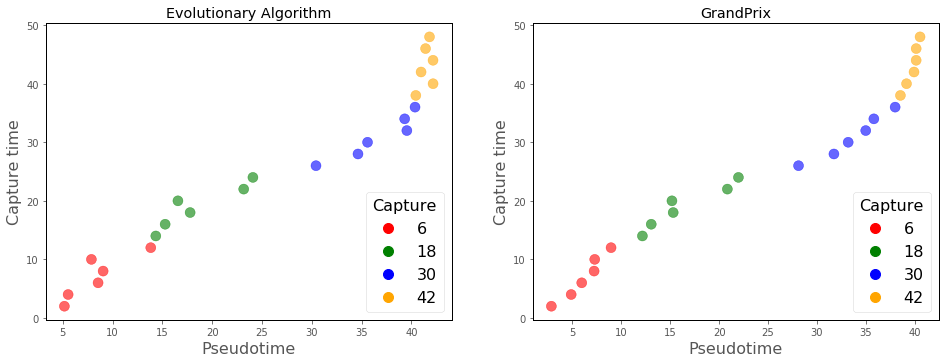

In [68]:
from matplotlib import pyplot as plt
# from utils import plot
actual_capture_time = mData['capture.orig'].values
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 12))
plt.subplot(2, 2, 1)
plot('Evolutionary Algorithm', 'Pseudotime', 'Capture time', best, actual_capture_time, mData['capture'].values)
plt.subplot(2, 2, 2)
plot('GrandPrix', 'Pseudotime', 'Capture time', GrandPrixPseudotime, actual_capture_time, mData['capture'].values)
plt.show()

In [12]:
from scipy import stats
print(stats.spearmanr(best, GrandPrixPseudotime))

SpearmanrResult(correlation=0.9913043478260868, pvalue=7.113899561244949e-21)


In [18]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import  numpy as np
import  pandas as pd
from collections import OrderedDict
from cycler import cycler
import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'black'
# plt.rc('axes', color_cycle=['royalblue', 'orange', 'green', 'red', 'blueviolet', 'sienna', 'hotpink', 'gray', 'y', 'c'])
# plt.rc('axes', color_cycle=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y'])
plt.rc('axes', prop_cycle=cycler(color=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y']))
# axes.prop_cycle : cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])


def plot(title, xLabel, yLabel, xData, yData, cpt, xErr=None, **kwargs):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    # plt.figure(figsize=(8, 6))
    plt.title( '%s' % ( title ) )
    plt.xlabel('%s' % (xLabel), fontsize=16)
    plt.ylabel('%s' % (yLabel), fontsize=16)

    cellCapture = OrderedDict((('6', 'red'), ('18', 'green'), ('30', 'blue'), ('42', 'orange')))
    color_map = [0 for i in range(len(cpt))]

    for i in range(0, len(cpt)):
        if cpt[i] == 6:
            color_map[i] = 'red'
        elif cpt[i] == 18:
            color_map[i] = 'green'
        elif cpt[i] == 30:
            color_map[i] = 'blue'
        else:
            color_map[i] = 'orange'

    if 'datset' in kwargs:
        cellCapture = OrderedDict((('0', 'red'), ('2', 'green'), ('4', 'blue'), ('7', 'orange')))
        for i in range(0, len(cpt)):
            if cpt[i] == 1:
                color_map[i] = 'red'
            elif cpt[i] == 2:
                color_map[i] = 'green'
            elif cpt[i] == 3:
                color_map[i] = 'blue'
            else:
                color_map[i] = 'orange'

    # print(cellCapture)
    markers = [plt.Line2D([0, 0], [0, 0], color=color, marker='o', ms=10, linestyle='') for color in cellCapture.values()]

    plt.scatter(xData, yData, 100, c=color_map, alpha=0.6)
    if xErr is not None:
        plt.errorbar(xData, yData, xerr=xErr, fmt='none', marker='none', ecolor=color_map)

    # l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', bbox_to_anchor=(1.1, 0.5), loc=10, fontsize=16)
    l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', loc=4, fontsize=16)
    plt.setp(l.get_title(), fontsize=16)
    # plt.show()